# Harmonic Trading Patterns

## Description

Harmonic trading patterns are comprised of five points: X, A, B, C, and D.  In this function, the user must supply the X point (the starting price of the pattern), the A point (the ending price of the first move in the pattern), the XAB ratio (the percentage of the B point relative to points X and A), the ABC ratio (the percentage of the C point relative to points A and B), the BCD ratio (the percentage of the D point relative to points B and C), the XAD ratio (the percentage of the D point relative to points X and A), and the AB=CD ratio (the percentage of the D point relative to points A and B).  The output is a five point harmonic trading pattern, or five points in currency terms, and a potential reversal zone (PRZ) which encompasses D, XAD, and ABCD, as well as three take profits: 38.2%, 61.8%, 100% and one stop loss: 38.2% (generated using the measurement from the A point to the D point).  A corresponding visualization has been added to allow for the observation of all of the above mentioned more clearly.

## Import

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

## Function

In [2]:
def pattern(X: float, A: float, XAB_ratio: float, ABC_ratio: float, \
           BCD_ratio: float, XAD_ratio: float, ABCD_ratio: float) -> None:
    """Given the X point, A point, XAB ratio, ABC ratio, BCD ratio, XAD ratio,
    and AB=CD ratio, get the X point, A point, B point, C point, D point,
    XAD point, ABCD point, 38.2% take profit, 61.8% take profit,
    100% take profit, and 38.2% stop loss."""
    assert X > 0, "X must be greater than 0"
    assert A > 0, "A must be greater than 0"
    assert 0.382 <= XAB_ratio <= 3.618, "Ratios must be between 0.382 and 3.618"
    assert 0.382 <= ABC_ratio <= 3.618, "Ratios must be between 0.382 and 3.618"
    assert 0.382 <= BCD_ratio <= 3.618, "Ratios must be between 0.382 and 3.618"
    assert 0.382 <= XAD_ratio <= 3.618, "Ratios must be between 0.382 and 3.618"
    assert 0.382 <= ABCD_ratio <= 3.618, "Ratios must be between 0.382 and 3.618"
    B = A - ((A - X) * XAB_ratio)
    C = B - ((B - A) * ABC_ratio)
    D = C - ((C - B) * BCD_ratio)
    XAD = A - ((A - X) * XAD_ratio)
    ABCD = C - ((A - B) * ABCD_ratio)
    take_profit_382 = D + ((A - D) * 0.382)
    take_profit_618 = D + ((A - D) * 0.618)
    take_profit_100 = D + (A - D)
    stop_loss_382 =  D - ((A - D) * 0.382)
    print(f"points: X={format(X, '.8f')}, A={format(A, '.8f')}, \
B={format(B, '.8f')}, C={format(C, '.8f')}, D={format(D, '.8f')}")
    print()
    print(f"potential reversal zone: D={format(D, '.8f')}, \
XAD={format(XAD, '.8f')}, ABCD={format(ABCD, '.8f')}")
    print()
    print(f"take profits: 38.2%={format(take_profit_382, '.8f')}, \
61.8%={format(take_profit_618, '.8f')}, 100%={format(take_profit_100, '.8f')}")
    print()
    print(f"stop loss: 38.2%={format(stop_loss_382, '.8f')}")
    print()
    plt.plot(list(range(5)), [X, A, B, C, D])
    plt.scatter([4] * 6, [XAD, ABCD, take_profit_382, take_profit_618, \
                          take_profit_100, stop_loss_382])
    plt.text(0, X, f"X={format(X)}")
    plt.text(1, A, f"A={format(A)}")
    plt.text(2, B, f"B={format(B)}")
    plt.text(3, C, f"C={format(C)}")
    plt.text(4, D, f"D={format(D)}")
    plt.text(4, XAD, f"XAD={format(XAD)}")
    plt.text(4, ABCD, f"ABCD={format(ABCD)}")
    plt.text(4, take_profit_382, f"38.2%={format(take_profit_382)}")
    plt.text(4, take_profit_618, f"61.8%={format(take_profit_618)}")
    plt.text(4, take_profit_100, f"100%={format(take_profit_100)}")
    plt.text(4, stop_loss_382, f"stop loss={format(stop_loss_382)}")
    plt.title("Harmonic Trading Pattern")
    plt.ylabel("Price")
    plt.xticks(list(range(9)))
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

## Output

points: X=1460.00000000, A=1520.00000000, B=1490.00000000, C=1508.54000000, D=1471.46000000

potential reversal zone: D=1471.46000000, XAD=1466.84000000, ABCD=1470.44000000

take profits: 38.2%=1490.00228000, 61.8%=1501.45772000, 100%=1520.00000000

stop loss: 38.2%=1452.91772000



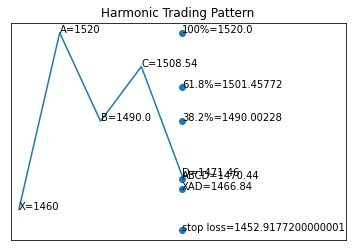

In [3]:
pattern(1460, 1520, 0.5, 0.618, 2.0, 0.886, 1.27)